# Onderzoek naar Airbnb in Amsterdam

## Inleiding
Airbnb is wereldwijd een van de bekendste platforms voor het boeken van verblijf. Het wordt veel gebruikt door toeristen, maar ook door vastgoedverhuurders die hun eigendommen via het platform aanbieden. Mijn persoonlijke interesse ligt vooral bij die laatste groep: de verhuurders. Stel dat ik de loterij win. Waar zou ik dan het beste in kunnen investeren, en wat doen mijn concurrenten? Voor welke prijs bieden zij bepaalde accommodaties aan, en in welke buurten is het aanbod het grootst? Om hier een beter beeld van te krijgen, ga ik kijken naar twee aspecten van de Airbnb-markt in Amsterdam:

1. **Gemiddelde prijs per kamertype**
   - Ik wil weten welk type accommodatie gemiddeld het meeste oplevert. Dit laat ik zien met een staafdiagram waarin de gemiddelde prijs per kamertype wordt weergegeven.

2. **Aantal accommodaties per buurt**
   - We bekijken hoe het aanbod verdeeld is over de stad. Sommige buurten hebben veel Airbnb’s, andere juist weinig. Dit laat ik zien met een staafdiagram dat het aantal accommodaties per buurt toont.


In [87]:
# inladen van packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

# Inladen van data
airbnb = pd.read_csv("https://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2025-06-09/data/listings.csv.gz")

## Datapreparatie

In [ ]:
airbnb.info()

In [ ]:
airbnb.isnull().sum()

Om de visualisaties uit te voeren, is het belangrijk om de data voor te bereiden:
- **Data opschonen**: We zullen controleren op ontbrekende waarden en deze waar nodig verwijderen in de kolommen voor prijs. Ook zal ik een nieuwe kolom maken waar de prijs een float is, zodat we operaties kunnen uitvoeren als mean voor het gemiddelde bijvoorbeeld.

In [88]:
# Nieuwe kolom met prijs als een float
airbnb['price_numeric'] = airbnb['price'].str.replace('$','').str.replace(',','').astype(float)

In [92]:
# Verwijderen van rijen met ontbrekende waarden in prijs
airbnb = airbnb.dropna(subset=['price_numeric'])




- **Groeperen en Aggregeren**: Hier groeperen we de data per room type en berekenen we de gemiddelde prijs. We tellen ook het aantal accommodaties per buurt. Zodat we kunnen zien welk type accommodatie het meeste oplevert, het aantal accommodaties per buurt te tellen, krijgen we inzicht in waar het aanbod het grootst is.

In [93]:
# Gemiddelde prijs per room_type
avg_price_per_room_type = airbnb.groupby('room_type')['price_numeric'].mean().reset_index()

# Het aantal accommodaties per buurt tellen
count_accommodations_per_neighbourhood = airbnb['neighbourhood_cleansed'].value_counts().reset_index()
count_accommodations_per_neighbourhood.columns = ['Buurt', 'Aantal_Accommodaties']
count_accommodations_per_neighbourhood

,Buurt,Aantal_Accommodaties
0,De Baarsjes - Oud-West,958
1,Centrum-West,739
2,De Pijp - Rivierenbuurt,638
3,Centrum-Oost,583
4,Zuid,394
5,Westerpark,361
6,Oud-Oost,310
7,Oud-Noord,268
8,Bos en Lommer,247
9,Oostelijk Havengebied - Indische Buurt,228


### Visualisatie 1: Aantal Airbnb-accommodaties per buurt.
We gaan nu het aantal Airbnb-accommodaties per buurt visualiseren met een staafdiagram.

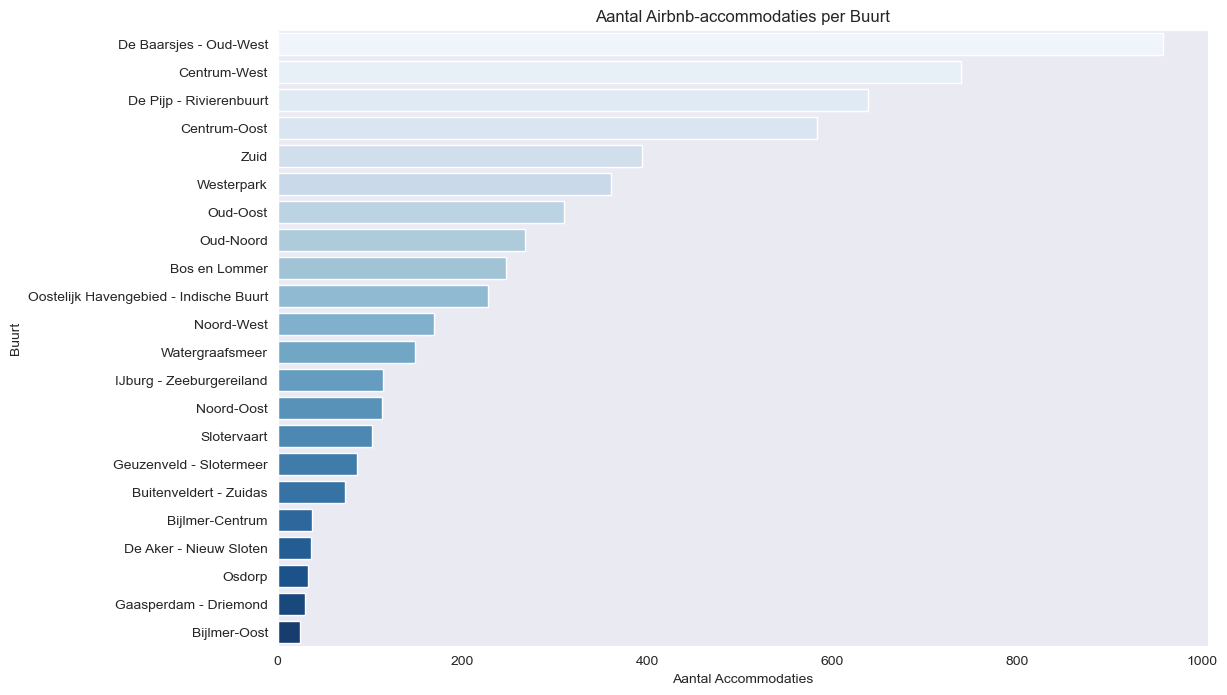

In [94]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Aantal_Accommodaties',y='Buurt',data=count_accommodations_per_neighbourhood,hue='Buurt',palette='Blues',legend=False)

plt.title('Aantal Airbnb-accommodaties per Buurt')
plt.xlabel('Aantal Accommodaties')
plt.ylabel('Buurt')
plt.grid(axis='x')
plt.show()

#### Conclusie 1

We hebben gekeken waar de meeste accommodaties liggen en hoe het aanbod verschilt per buurt. Er is een groot verschil tussen de buurten met veel accommodaties en die met weinig. Sommige buurten hebben dus veel meer aanbod dan andere. Wat mij opviel, is De Baarsjes. Ik had verwacht dat er vooral veel accommodaties zouden zijn in het centrum, omdat daar veel toeristen komen. Maar De Baarsjes heeft verrassend veel aanbod. Misschien kiezen toeristen steeds vaker voor buurten net buiten het centrum, zoals De Baarsjes. Deze informatie is handig als je wilt weten waar nog kansen liggen, bijvoorbeeld voor nieuwe accommodaties.

### Visualisatie 2: Gemiddelde Prijs per Room Type
We gaan nu de gemiddelde prijs per room type visualiseren met een staafdiagram.

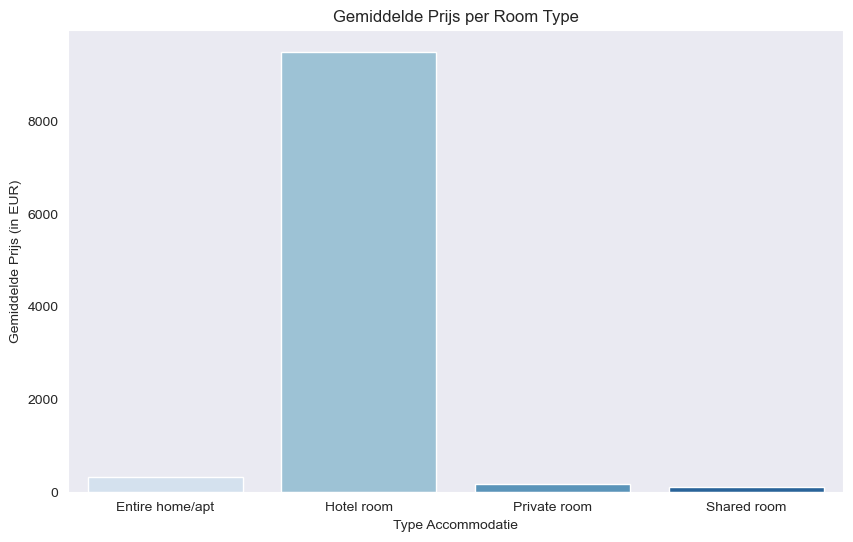

In [95]:
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='price_numeric', data=avg_price_per_room_type, hue='room_type', palette='Blues', legend=False)
plt.title('Gemiddelde Prijs per Room Type')
plt.xlabel('Type Accommodatie')
plt.ylabel('Gemiddelde Prijs (in EUR)')
plt.grid(axis='y')
plt.show()

#### Conclusie 2

We hebben onderzocht wat de gemiddelde prijs is per type accommodatie. Daarbij hebben we gekeken naar verschillende soorten verblijven, zoals appartementen, hotel kamers, kamers en gedeelde kamers. Elk type heeft zijn eigen prijsklasse. Zo zijn appartementen vaak duurder dan kamers, en gedeelde kamers nog goedkoper. Door deze vergelijking krijgen we een beter beeld van hoe de prijzen verschillen per type verblijf. Dit is handig voor mensen die een accommodatie willen boeken, maar ook voor verhuurders die hun prijs willen afstemmen op de markt.